In [39]:
from pathlib import Path

hdf5_dir = Path("data/hdf5/")
hdf5_dir.mkdir(parents=True, exist_ok=True)

In [100]:
import h5py
import os

hf = h5py.File(hdf5_dir/'data.h5', 'a')
img_folder = Path('img/')

In [101]:
from tqdm.notebook import tqdm
import numpy as np

group = hf.create_group(img_folder.as_posix())

for sub_folder in tqdm(os.listdir(img_folder)):
    impath = img_folder/sub_folder
    sub_group = group.create_group(sub_folder)
    for image in os.listdir(impath):
        with (impath/image).open('rb') as image_file:
            binary_data = image_file.read()
            binary_data = np.asarray(binary_data)
            dataset = sub_group.create_dataset(image, data=binary_data)
        
    

In [102]:
from PIL import Image
import io
hf.close()

hf = h5py.File(hdf5_dir/'data.h5', 'r')
example = hf['img']['1981_Graphic_Ringer_Tee']
imgs = []
for file in example:
    imgs.append(io.BytesIO(np.array(example[file])))

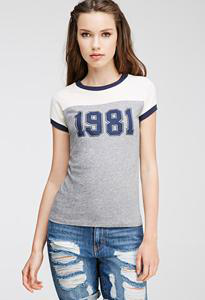

In [103]:
Image.open(imgs[0])

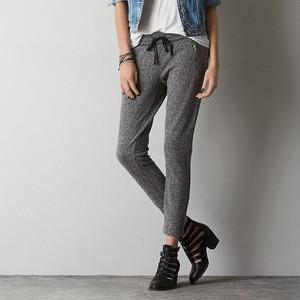

In [105]:
for folder in tqdm(hf['img']):
    for file in hf['img'][folder]:
        tmp = np.array(hf['img'][folder][file])
Image.open(io.BytesIO(tmp))

In [128]:
hf.close()

hf = h5py.File(hdf5_dir/'data.h5', 'a')

folders = ['Eval', 'Anno_coarse', 'Anno_fine']
for folder in tqdm(folders):
    f_path = Path(folder)
    try:
        sf = hf.create_group(folder)
    except:
        sf = hf[folder]
    for file in os.listdir(f_path):
        if (os.path.isfile(f_path/file)):
            with (f_path/file).open('rb') as in_file:
                data = in_file.readlines()
                data = np.asarray(data)
                sf.create_dataset(file, data=data)
                
    

In [129]:
hf.close()

hf = h5py.File(hdf5_dir/'data.h5', 'r')
hf.keys()

<KeysViewHDF5 ['Anno_coarse', 'Anno_fine', 'Eval', 'img']>

In [131]:
hf['Eval'].keys()

<KeysViewHDF5 ['list_eval_partition.txt']>

In [132]:
hf['Eval']['list_eval_partition.txt']

<HDF5 dataset "list_eval_partition.txt": shape (289224,), type "|S78">

In [134]:
lines = np.array(hf['Eval']['list_eval_partition.txt'])
lines[:5]

array([b'289222\n', b'image_name  evaluation_status\n',
       b'img/Sheer_Pleated-Front_Blouse/img_00000001.jpg                        train\n',
       b'img/Sheer_Pleated-Front_Blouse/img_00000002.jpg                        train\n',
       b'img/Sheer_Pleated-Front_Blouse/img_00000003.jpg                        val\n'],
      dtype='|S78')

In [137]:
hf.close()